In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
def fetch_weather_data(city, api_key):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: Unable to fetch data for {city}")
        return None


In [3]:
def parse_weather_data(data):
    main = data['main']
    weather = data['weather'][0]
    return {
        'Temperature': main['temp'],
        'Feels Like': main['feels_like'],
        'Min Temp': main['temp_min'],
        'Max Temp': main['temp_max'],
        'Pressure': main['pressure'],
        'Humidity': main['humidity'],
        'Weather': weather['main'],
        'Description': weather['description'],
        'Date': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    }


In [4]:
def collect_data(cities, api_key):
    weather_data = []
    for city in cities:
        data = fetch_weather_data(city, api_key)
        if data:
            parsed_data = parse_weather_data(data)
            parsed_data['City'] = city
            weather_data.append(parsed_data)
    return pd.DataFrame(weather_data)


In [5]:
# Replace with your actual OpenWeatherMap API key
api_key = 'fb365aa6104829b44455572365ff3b4e'
cities = ["London", "New York", "Tokyo", "Delhi", "Paris"]

# Collect weather data
weather_df = collect_data(cities, api_key)

# Display the DataFrame
weather_df


,Temperature,Feels Like,Min Temp,Max Temp,Pressure,Humidity,Weather,Description,Date,City
0,9.31,7.35,8.09,10.20,1035,87,Clouds,broken clouds,2024-11-13 06:16:19,London
1,7.15,3.05,5.62,8.19,1025,45,Smoke,smoke,2024-11-13 06:16:19,New York
2,18.55,17.90,17.75,19.33,1020,55,Clouds,few clouds,2024-11-13 06:16:20,Tokyo
3,18.05,18.52,18.05,18.05,1013,100,Fog,fog,2024-11-13 06:16:20,Delhi
4,9.28,6.64,8.33,10.04,1030,83,Clouds,overcast clouds,2024-11-13 06:16:20,Paris


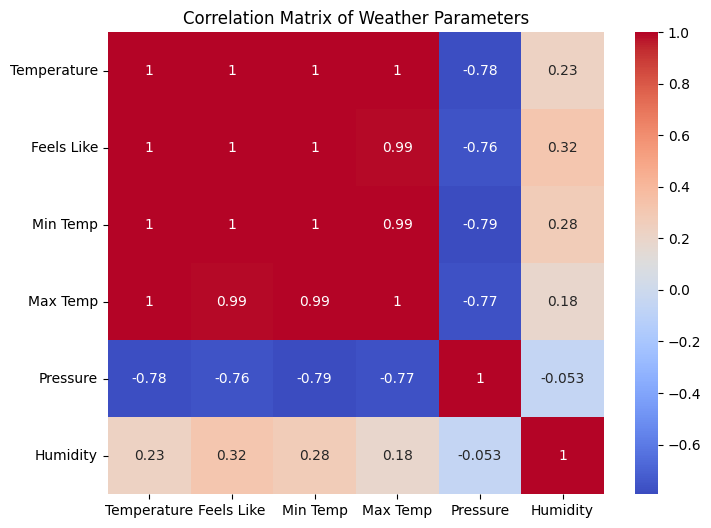

In [6]:
def correlation_analysis(df):
    correlation_matrix = df[['Temperature', 'Feels Like', 'Min Temp', 'Max Temp', 'Pressure', 'Humidity']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix of Weather Parameters")
    plt.show()

# Perform Correlation Analysis
correlation_analysis(weather_df)


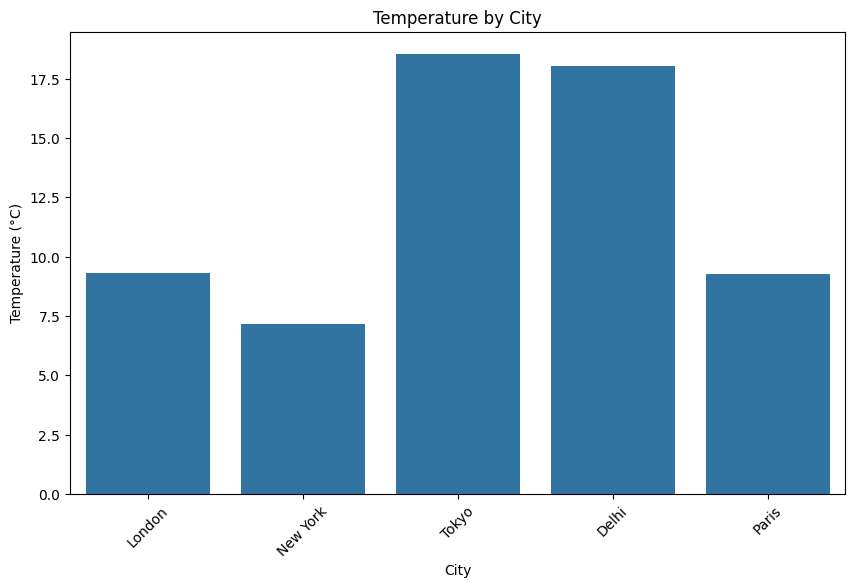

In [7]:
def temperature_analysis(df):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='City', y='Temperature', data=df)
    plt.title("Temperature by City")
    plt.xlabel("City")
    plt.ylabel("Temperature (°C)")
    plt.xticks(rotation=45)
    plt.show()

# City-wise Temperature Analysis
temperature_analysis(weather_df)


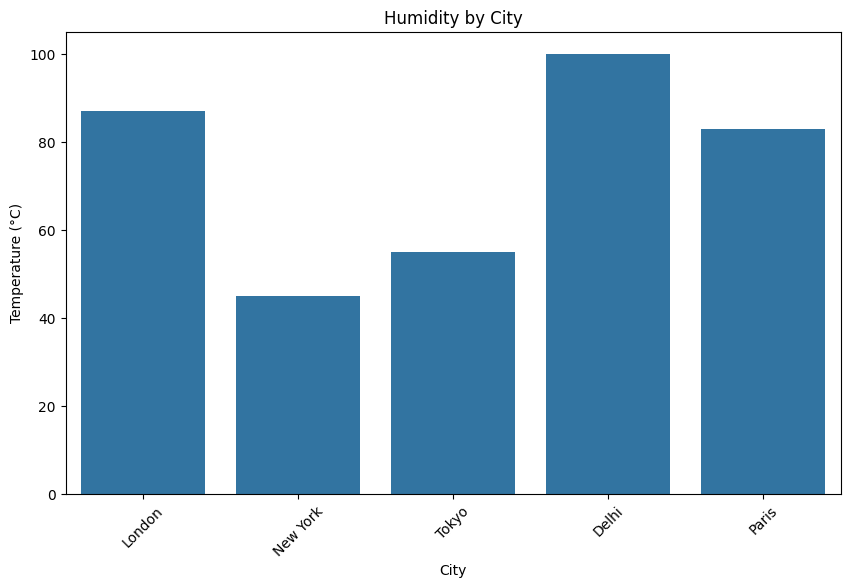

In [8]:
def Humidity_analysis(df):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='City', y='Humidity', data=df)
    plt.title("Humidity by City")
    plt.xlabel("City")
    plt.ylabel("Temperature (°C)")
    plt.xticks(rotation=45)
    plt.show()

# City-wise Temperature Analysis
Humidity_analysis(weather_df)